In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Step 2: Install required packages
!pip install ultralytics opencv-python-headless matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
# Step 3: Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO("yolov8n.pt")  # Or use yolov8s/yolov8m/yolov8l depending on accuracy-speed tradeoff


100%|██████████| 6.25M/6.25M [00:00<00:00, 109MB/s]


In [ ]:
# Example path to your video inside Google Drive
video_path = "/content/drive/MyDrive/collison/collide.mp4"
output_path = "/content/drive/MyDrive/collison/output.mp4"

In [ ]:
# Step 6: Distance Estimation Function
KNOWN_WIDTH = 2.0  # meters (average width of a vehicle)
FOCAL_LENGTH = 615  # Adjust if you have a calibrated value

def estimate_distance(focal_length, real_width, pixel_width):
    if pixel_width == 0:
        return float('inf')
    return (real_width * focal_length) / pixel_width


In [ ]:
# Step 7: Process video and save annotated output
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)[0]

    for box in results.boxes:
        cls = int(box.cls[0])
        label = model.names[cls]
        conf = float(box.conf[0])
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        box_width = x2 - x1

        if label in ['car', 'bus', 'truck', 'motorbike']:
            distance = estimate_distance(FOCAL_LENGTH, KNOWN_WIDTH, box_width)
            color = (0, 0, 255) if distance < 5 else (0, 255, 0)

            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, f"{label}: {distance:.2f}m", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

            if distance < 5:
                cv2.putText(frame, "⚠️ COLLISION RISK!", (x1, y2 + 20),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    out.write(frame)

cap.release()
out.release()
print(f"✅ Annotated video saved to: {output_path}")


Streaming output truncated to the last 5000 lines.
Speed: 2.9ms preprocess, 8.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 2 trucks, 8.7ms
Speed: 2.9ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 6.6ms
Speed: 3.3ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 10.0ms
Speed: 3.2ms preprocess, 10.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 10.7ms
Speed: 3.1ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 7.0ms
Speed: 2.9ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 8.3ms
Speed: 2.9ms preprocess, 8.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 9.7ms
Speed: 2.9ms preprocess, 9.

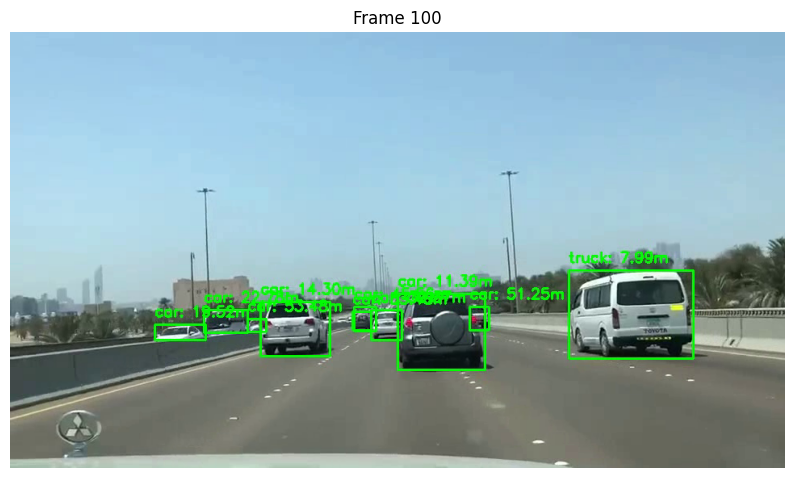

In [ ]:
# Step 8: Show a sample frame from output video
def show_frame_from_video(path, frame_number=100):
    cap = cv2.VideoCapture(path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    cap.release()

    if ret:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 6))
        plt.imshow(frame_rgb)
        plt.title(f"Frame {frame_number}")
        plt.axis('off')
        plt.show()
    else:
        print("Unable to read frame.")

# Show frame #100 (change if needed)
show_frame_from_video(output_path)
